In [ ]:
import numpy as np

gamma = 0.75 #gamma highだとfuture reward重視、lowだとimmediate reward重視
alpha = 0.9 #alphaは0~1 #1だと過去全部忘れて新しいplayだけに依存、0だと何も新しいplayから学ばない

state = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}

actions = [0,1,2,3,4,5,6,7,8]

rewards = np.array([[0,1,0,0,0,0,0,0,0],
                    [1,0,1,0,1,0,0,0,0],
                    [0,1,0,0,0,1,0,0,0],
                    [0,0,0,0,0,0,1,0,0],
                    [0,1,0,0,0,0,0,1,0],
                    [0,0,1,0,0,0,0,0,0],
                    [0,0,0,1,0,0,0,1,0],
                    [0,0,0,0,1,0,1,0,999], # Reward for transitioning to L9 is 999 #これにより、L9がgoalかつL8->L9が唯一の道であるscenarioが設定
                    [0,0,0,0,0,0,0,1,0]])
#reward設定により、どの部屋がどの部屋に繋がっているか(どこが仕切られているか)(L9が最終地点)を設定出来る (下図参考)
#縦軸: state 横軸: action

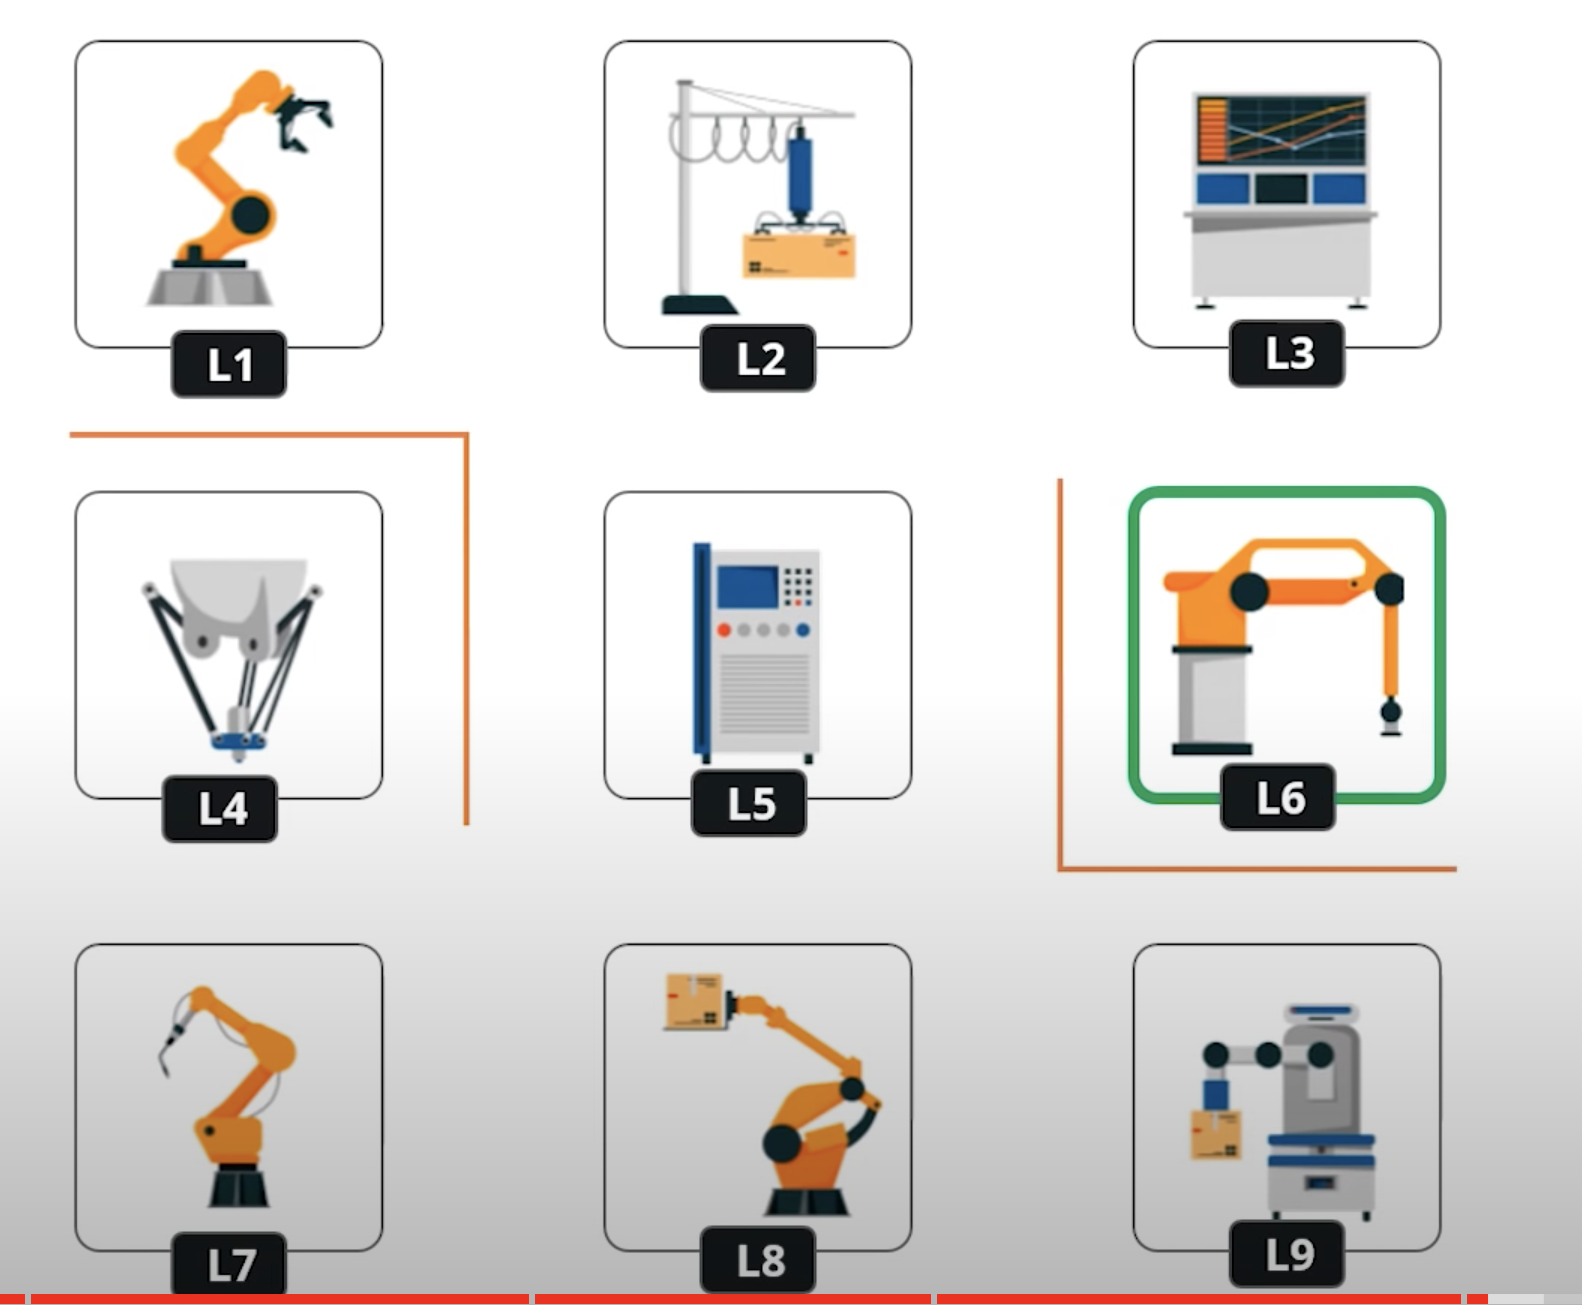

In [ ]:
# Initialize Q-Values
Q = np.array(np.zeros([9,9]))
#[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 #[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
#initial状態からstart







# Q-Learning
for i in range(10000): #10000回試行attempt #Current state: L6だとしたらPossible actions: [2] etc

    curr_state = np.random.randint(0,9) #generate a random integer between 0 (inclusive) and 9 (exclusive) #randomなstateにいる状態からstart

    for _ in range(100): #range(n)は0からn-1を生成 #randomなcurrent stateにつき、100回分以下の処理を繰り返す
        possible_actions = [] #array型caseにぶち込む
        for j in range(9):
            #range(n)は0からn-1を生成
            #つまり今回は0~8 #今回は何回繰り返すかではなくrewards[curr_state, j(action: 0~8)]みたいに
            #randomのcurrent stateから0~8のどのactionを起こせば、reward1かをaction0~8順番に網羅して確認してる
            if rewards[curr_state, j] > 0: #最初に設定したrewards tableにおける、[curr_state(縦軸),j(横軸、つまりactionだからこのstateに移動した時)]が0より大きい or not
                possible_actions.append(j) #0より大きければpossible_actionsとしてぶち込む(採用)
                #print(f"Current state: L{curr_state+1}, Possible actions: {possible_actions}") #Current state: L2, Possible actions: 1, 3, 5みたいに無限に出力される

        if not possible_actions: #要するに進む選択肢がないL9
            break

        next_state = np.random.choice(possible_actions)
        #例えば、possible actionの可能性が2と8とかの時に、何で網羅的に2と8をcheckせず、randomに攻める??
        #もし2選んで、次もrandomだから2選んじゃったらだめ。だってもうそれalready試した+8試せなくなっちゃう
        #でも、大丈夫、例えばrestaurantAとBあって、Aに3回行って、Bに行かなかったとしても、最終的にBに行った時に既に3回行ってる経験が活きて、よりconfidently decision決めれる

        TD = rewards[curr_state,next_state] + gamma * np.max(Q[next_state,]) - Q[curr_state,next_state]
        Q[curr_state,next_state] += alpha * TD
        ###あのall 0だったinitial Q表を埋めていきたい###
        #1行目は、Q-learningメモにでもやった公式
        #2行目にて1行目の計算結果をどれくらい反映するかをalphaで決めて、その結果をpreviousのQ表に加えて更新していく
        #(2行目: Q[curr_state,next_state] = alpha * TD + Q[curr_state,next_state])
        curr_state = next_state
        #駒を次に進めて更新して、また上に戻って処理 #これを無限に繰り返す
        if curr_state == 8:  # Break when end state is reached
            break

print(Q)
###10000回試行attempt終わった状態でのQ表をひとまず確認してみる










curr_state = 0 #スタート地点
optimal_path = ['L1'] #だからoptimal_path出す時に、L1からstartする配列になる

for _ in range(100):
    next_state = np.argmax(Q[curr_state,])
    curr_state = next_state
    #argmax何個かある中にて最大のをひとつ抽出
    #例えば、Q表よりcurr_state 0(L1)にいたら、[0,966.35714286,0,0,0,0,0,0,0]だからaction左から2番目を取る(action1)
    #なので、次に1(L2)がcurr_stateに入り、また上からstart
    #state1時点にて、Q表より[725.76785714,0,725.76785714,0,1287.14285714,0,0,0,0]だからaction左から5番目を取る(action4)
    #なので、次に4(L5)がcurr_stateに入り、また上からstart・・・
    optimal_path.append(f'L{curr_state+1}')
    if curr_state == 8:  # Break when end state is reached
        break

print('Optimal path:', ' -> '.join(optimal_path))

[[   0.          966.35714286    0.            0.            0.
     0.            0.            0.            0.        ]
 [ 725.76785714    0.          725.76785714    0.         1287.14285714
     0.            0.            0.            0.        ]
 [   0.          966.35714286    0.            0.            0.
   545.32589286    0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.         1287.14285714    0.            0.        ]
 [   0.          966.35714286    0.            0.            0.
     0.            0.         1714.85714286    0.        ]
 [   0.            0.          725.76785714    0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.          966.35714286    0.
     0.            0.         1714.85714286    0.        ]
 [   0.            0.            0.            0.         1287.14285714
     0.         1287.14285714    0.         2285.14285714]
